# preprocess dataset

In [151]:
import pandas as pd
import csv
import codecs
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from sklearn.feature_extraction.text import CountVectorizer
from numpy import linalg as LA
import math

In [10]:
df = pd.read_csv('./Tab.delimited.Cleaned.dataset.WITH.variable.labels.csv', sep='\t',encoding='ISO-8859-1')

/usr/lib/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,55,59,61,65,68,69,70,83,90,91,92,93,120,121,122,123,126,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
df3 = pd.read_csv('./ML3AllSites.csv', sep=',',encoding='ISO-8859-1')

/usr/lib/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,19,20,129,132,169,230) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Get list from pandas dataframe column headers

In [11]:
list(df.columns.values)

['session_id',
 'session_date',
 'last_update_date',
 'session_last_update_date',
 'referrer',
 'creation_date',
 'session_creation_date',
 'expcomments',
 'numparticipants_actual',
 'numparticipants',
 'expgender',
 'exprace',
 'exprunafter',
 'exprunafter2',
 'compensation',
 'recruitment',
 'separatedornot',
 'age',
 'sample',
 'sunkgroup',
 'sunkDV',
 'gainlossgroup',
 'gainlossDV',
 'anch1group',
 'anch2group',
 'anch3group',
 'anch4group',
 'anchoring1',
 'anchoring2',
 'anchoring3',
 'anchoring4',
 'Ranchori',
 'RAN001',
 'RAN002',
 'RAN003',
 'Ranch1',
 'Ranch2',
 'Ranch3',
 'Ranch4',
 'gambfalgroup',
 'gambfalDV',
 'gamblerfallacya_sd',
 'gamblerfallacyb_sd',
 'scalesgroup',
 'scalesreca',
 'scalesrecb',
 'scales',
 'reciprocitygroup',
 'reciprocityother',
 'reciprocityus',
 'allowedforbiddenGroup',
 'allowedforbidden',
 'quotearec',
 'quotebrec',
 'quoteGroup',
 'quote',
 'totalflagestimations',
 'totalnoflagtimeestimations',
 'flagfilter',
 'flagdv',
 'flagGroup',
 'Sysjust'

In [75]:
df1 = df[['age']]

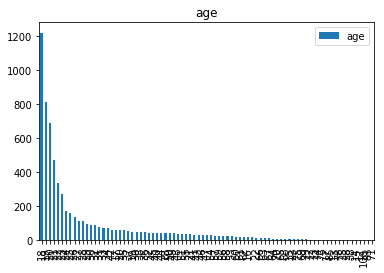

In [76]:
p = df1.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [77]:
arr = df1.values

# Some value does not exist

In [338]:
for i in range(len(arr)):
    try:
        arr[i][0] = int(arr[i][0])
    except ValueError:
        print ("on line",i)

on line 431
on line 507
on line 515
on line 519
on line 569
on line 2788
on line 2828
on line 3047
on line 3413
on line 4141
on line 4193
on line 4205
on line 4333
on line 4470
on line 5447
on line 5657


In [339]:
for i in range(len(arr)):
    if arr[i][0] == ' ':
        print(i)

431
507
515
519
569
2788
2828
3047
3413
4141
4193
4205
4333
4470
5447
5657


# Need to perform kmeans clustering for each attribute

In [195]:
class KMeans:
    def __init__(self, n_clusters=64):
        self.n_clusters = n_clusters  # number of clusters
        self.centers = None  # to record the centers
        self.labels = None
        self.Y = None

    def random_center(self):
        # randomly generate n_cluster clusters in the raange of X
        self.centers = np.random.rand(self.n_clusters, 3)
        for j in range(3):
            Y_j_min = self.Y[:,j].min()
            Y_j_max = self.Y[:,j].max()
            self.centers[:,j] = Y_j_min + (Y_j_max - Y_j_min) * self.centers[:,j]
    
    def random_center2(self,Y):
    # randomly generate n_cluster clusters in the raange of X
        self.centers = np.random.rand(self.n_clusters, len(Y[0]))
        for i in range(self.n_clusters):
            self.centers[i] = Y[i]
#         for j in range(0):
#             Y_j_min = self.Y[:,j].min()
#             Y_j_max = self.Y[:,j].max()
#             self.centers[:,j] = Y_j_min + (Y_j_max - Y_j_min) * self.centers[:,j]
            
            
            
    def dist(self, point1, point2): #old one
        return 2*(point1[0]-point2[0])**2 + 4*(point1[1]-point2[1])**2 + 3*(point1[2]-point2[2])**2

    def dist2(self,point1,point2):
        return LA.norm(point1-point2)**2
    

    def fit(self, Y):
        self.Y = Y
        self.labels = np.zeros(Y.shape[0], dtype='uint8')  # record the current labels of each sample of X
        self.random_center()
        diff = 1

        while diff > 1e-3:
            old_center = self.centers.copy()

            # go through all samples and label them using the nearest label
            for i in range(Y.shape[0]):
                distance = np.zeros(self.n_clusters)
                for j in range(self.n_clusters):
                    distance[j] = self.dist(Y[i], self.centers[j])
                self.labels[i] = np.argmin(distance)
                
                
            # update the centers
            for i in range(self.n_clusters):
                self.centers[i] = Y[self.labels==i].mean(axis=0)

            # update the difference
            diff = np.linalg.norm(self.centers - old_center)
        return self
    
    def fit2(self, Y):
        self.Y = Y
        self.labels = np.zeros(Y.shape[0], dtype='uint8')  # record the current labels of each sample of X
        self.random_center2(Y)
        diff = 1
        
        while diff > 1e-3:
            old_center = self.centers.copy()

            # go through all samples and label them using the nearest label
            for i in range(Y.shape[0]):
                distance = np.zeros(self.n_clusters)
                for j in range(self.n_clusters):
                    distance[j] = self.dist2(Y[i], self.centers[j])
                self.labels[i] = np.argmin(distance)
                
                
            # update the centers
            for i in range(self.n_clusters):
                self.centers[i] = Y[self.labels==i].mean(axis=0)
                

            # update the difference
            diff = np.linalg.norm(self.centers - old_center)
            print(diff)
        return self
    
    
    def transform(self, Y):
        out = np.zeros(Y.shape)
        for i in range(self.n_clusters):
            out[self.labels==i] = self.centers[i]
        return out
    

# oneHOTENCODING

In [74]:
def oneHotEncoding(Y, kmeans):
    out = np.zeros((len(Y), kmeans.n_clusters))
    for i in range(len(Y)):
        out[i, Y[i]] = 1
    return out

In [78]:
di = []
for i in range(len(arr)):
    if arr[i][0] != ' ':
        di.append(int(arr[i][0]))
    else:
        print(i)

431
507
515
519
569
2788
2828
3047
3413
4141
4193
4205
4333
4470
5447
5657


In [79]:
arr2 = np.asarray(di)

In [80]:
arr2.shape

(6328,)

In [81]:
arr2

array([18, 19, 18, ..., 20, 19, 19])

In [82]:
kmeans = KMeans(20).fit2(arr2)

/usr/lib/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice.
/usr/lib/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[ 0  1  8 16 17]


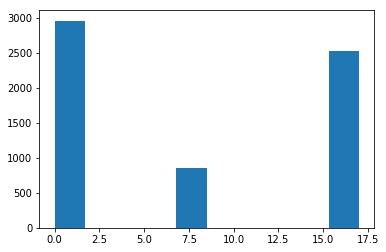

In [83]:
plt.hist(kmeans.labels)
arr = np.asarray(kmeans.labels)
arr = np.unique(arr)
print(arr)

In [361]:
Y = oneHotEncoding(kmeans.labels,kmeans)

In [362]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# test clustering numbered data:
    step1 : get single column
    step2 : sort in increasing order
    step3 : based on distribution, cut data into 4 section with equally number of candidate
    step4 : if data is null, set isnon to be true for that column
    step5 : append new datacol to input_arr

In [5]:
df1 = df[['age']]  #get col of age data

In [7]:
arr = df1.values

In [32]:
di = []
for i in range(len(arr)):
    if arr[i][0] != ' ':
        di.append(int(arr[i][0]))
    else:
        di.append(-1)

In [33]:
di.sort()

In [34]:
for i in range(len(di)):
    if di[i] == ' ':
        print (i)

In [35]:
len(di)

6344

In [37]:
len(di)

6344

In [42]:
def getdistriarr(arr):
    ans_arr = []
    leng = len(arr)
    ans_arr.append(arr[int(leng/4)])
    ans_arr.append(arr[int(leng/2)])
    ans_arr.append(arr[int(leng*0.75)])
    ans_arr.append(arr[int(leng-1)])
    return ans_arr

In [97]:
def oneHotEncoding_return_arr(att_arr,class_arr): #one 
    #add one more column for each row since last col used as flag
    choice = len(class_arr)
    out = np.zeros((len(att_arr),len(class_arr)+1))
    for i in range(len(att_arr)):
        loc = 0
        #first jude if data is null
        if att_arr[i] == -1:
            out[i][-1] = -1
            continue
        else:
            out[i][-1] = 1
            for j in range(len(class_arr)):
                if att_arr[i] < class_arr[j]:
                    out[i][j] = 1
                    break
        
    return out

        
    

In [184]:
def append_arr(old,new):
    #both old and new has the same num of row
    #create a new nparray

    newdim = len(old[0])+len(new[0])
    print('newdim is',newdim)
    ans = np.zeros((len(old),newdim))
    print(ans.shape)
    for i in range(len(old)):
        ans[i] = np.append(old[i],new[i])
    return ans

# STEP TWO CONVERT NLP DATASET INTO VECTOR:
    STEP1: vectorize dataset
    STEP2: apply kmeans clustering to language data
    STEP3: ONEHOT ENCODING
    STEP4: APPEND CLASSIFICATION DATASET INTO old CLASSFICAITION ARR

In [184]:
def NLPDATAPRO(allsentences):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(allsentences)
    ans = X.toarray()
    return ans

In [113]:
def createtextarr(attri_col):
    df2 = df[[attri_col]]
    arr = df2.values
    for i in range(len(arr)):
        di.append(arr[i][0])
    return arr

# STEP THREE CONVERT TEXT_DATASET WITH FIXED classification into vector

In [128]:
df2= df3['anagrams3']

In [129]:
arr = df2.values

In [169]:
def processnull:
    arrnew = []
    for i in range(len(arr)):
        if type(arr[i]) == float and math.isnan(arr[i]) :
            arrnew.append('Nan')
        else:
            arrnew.append(arr[i])
    return arrnew

In [182]:
def returnuniqiearr(og):
    ar = np.asarray(og)
    return np.unique(ar)

# TODO: create a function to append text to old vecto(remember to append flag)